In [1]:
# Inspecting May & Springel Simulation data

In [1]:
import h5py

# Path to the HDF5 file
file_path = "/n/holyscratch01/dvorkin_lab/nephremidze/may-springel-fuzzy-dark-matter-simulations/fdm-ic_p8640_b10000_m7e-23/density_halo_0.hdf5"

def inspect_hdf5(file_path):
    try:
        with h5py.File(file_path, "r") as f:
            # List all groups and datasets in the HDF5 file
            print("Groups and datasets within the file:")
            def print_attrs(name, obj):
                print(name)
                for key, val in obj.attrs.items():
                    print("    %s: %s" % (key, val))
            f.visititems(print_attrs)
    except Exception as e:
        print("An error occurred while inspecting the HDF5 file:", e)

inspect_hdf5(file_path)

def check_dimensions(file_path):
    try:
        with h5py.File(file_path, "r") as f:
            print("Dataset dimensions:")
            def print_shape(name, obj):
                if isinstance(obj, h5py.Dataset):
                    print(name, obj.shape)
            f.visititems(print_shape)
    except Exception as e:
        print("An error occurred while checking dimensions:", e)

check_dimensions(file_path)

Groups and datasets within the file:
FuzzyDM
FuzzyDM/DENSITY
Dataset dimensions:
FuzzyDM/DENSITY (593, 593, 593)


(417, 417, 417)


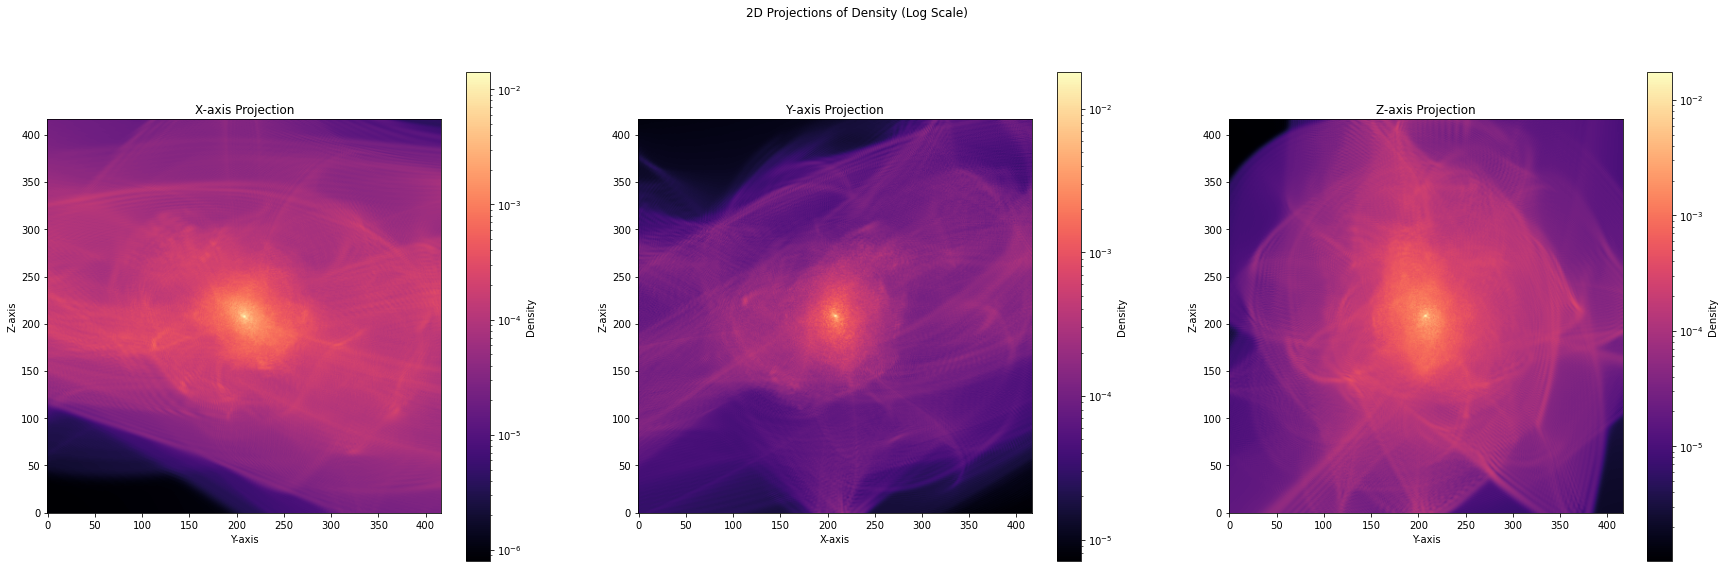

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import h5py

# Path to the HDF5 file
halo_num = "11"
file_path = "/n/holyscratch01/dvorkin_lab/nephremidze/may-springel-fuzzy-dark-matter-simulations/fdm-ic_p8640_b10000_m7e-23/density_halo_"+halo_num+".hdf5"

def get_data(file_path):
    
    with h5py.File(file_path, "r") as f:
        dataset = f["FuzzyDM/DENSITY"]
        fdm_density = np.array(dataset)
        print(np.shape(fdm_density))
        
    return fdm_density

def get_projections(fdm_density):

    # Create simple 2D projections along x, y, and z axes
    x_proj = np.sum(fdm_density, axis=0)
    y_proj = np.sum(fdm_density, axis=1)
    z_proj = np.sum(fdm_density, axis=2)
        
    return x_proj, y_proj, z_proj


def plot_2d_projections(x_proj, y_proj, z_proj):

    f, ax = plt.subplots(1, 3, figsize=(30, 9))
    ax[0].imshow(x_proj, cmap='viridis', origin='lower', norm=LogNorm())
    ax[1].imshow(y_proj, cmap='viridis', origin='lower', norm=LogNorm())
    ax[2].imshow(z_proj, cmap='viridis', origin='lower', norm=LogNorm())

    # Add colorbars and labels
    cbar = f.colorbar(ax[0].imshow(x_proj, cmap='magma', origin='lower', norm=LogNorm()), ax=ax[0])
    cbar.set_label('Density')
    ax[0].set_title('X-axis Projection')
    ax[0].set_xlabel('Y-axis')
    ax[0].set_ylabel('Z-axis')

    cbar = f.colorbar(ax[1].imshow(y_proj, cmap='magma', origin='lower', norm=LogNorm()), ax=ax[1])
    cbar.set_label('Density')
    ax[1].set_title('Y-axis Projection')
    ax[1].set_xlabel('X-axis')
    ax[1].set_ylabel('Z-axis')

    cbar = f.colorbar(ax[2].imshow(z_proj, cmap='magma', origin='lower', norm=LogNorm()), ax=ax[2])
    cbar.set_label('Density')
    ax[2].set_title('Z-axis Projection')
    ax[2].set_xlabel('Y-axis')
    ax[2].set_ylabel('Z-axis')

    plt.suptitle('2D Projections of Density (Log Scale)')
    plt.show()

fdm_density = get_data(file_path)
    
x_proj, y_proj, z_proj = get_projections(fdm_density)

plot_2d_projections(x_proj, y_proj, z_proj)

In [4]:
mass_rad_catalog_file_path = "/n/holyscratch01/dvorkin_lab/nephremidze/may-springel-fuzzy-dark-matter-simulations/fdm-ic_p8640_b10000_m7e-23/fdm_p8640_b10000_m7e-23_z3.txt"
mass_rad_catalog = np.loadtxt(mass_rad_catalog_file_path)
halo_IDs = []
halo_masses = []
halo_radii = []
for line in mass_rad_catalog:
    halo_IDs.append(int(line[0]))
    halo_masses.append(line[1])
    halo_radii.append(line[2])
    
print(halo_IDs)
print(halo_masses)
print(halo_radii)

[0, 1, 3, 4, 5, 8, 7, 14, 10, 6, 9, 20, 18, 13, 17, 11, 12, 15, 2, 29, 24, 22, 19, 25, 27, 31, 33, 26, 36, 41, 32, 30, 21, 35, 37, 42, 39, 45, 47, 46, 48, 38, 43, 40, 44, 23, 53, 54, 55, 51, 34, 62, 56, 60, 74, 76, 68, 58, 80, 69, 83, 88, 87, 70, 79, 92, 82, 133]
[352467800000.0, 258601660000.0, 226862250000.0, 204542820000.0, 198587800000.0, 186035670000.0, 183402450000.0, 177180720000.0, 170132370000.0, 165991830000.0, 151029900000.0, 134251454000.0, 131386230000.0, 129928470000.0, 125400150000.0, 121670440000.0, 114451300000.0, 113396015000.0, 109590980000.0, 107500890000.0, 105449320000.0, 104735510000.0, 104363730000.0, 103265970000.0, 102024720000.0, 97189340000.0, 93419310000.0, 90833580000.0, 88291530000.0, 83975730000.0, 83725840000.0, 80917190000.0, 79335930000.0, 78811685000.0, 73174560000.0, 69964400000.0, 69322110000.0, 62021980000.0, 59036668000.0, 56178627000.0, 55927360000.0, 53932413000.0, 51050910000.0, 44552860000.0, 44347660000.0, 43081523000.0, 40270930000.0, 38695

0
(593, 593, 593)


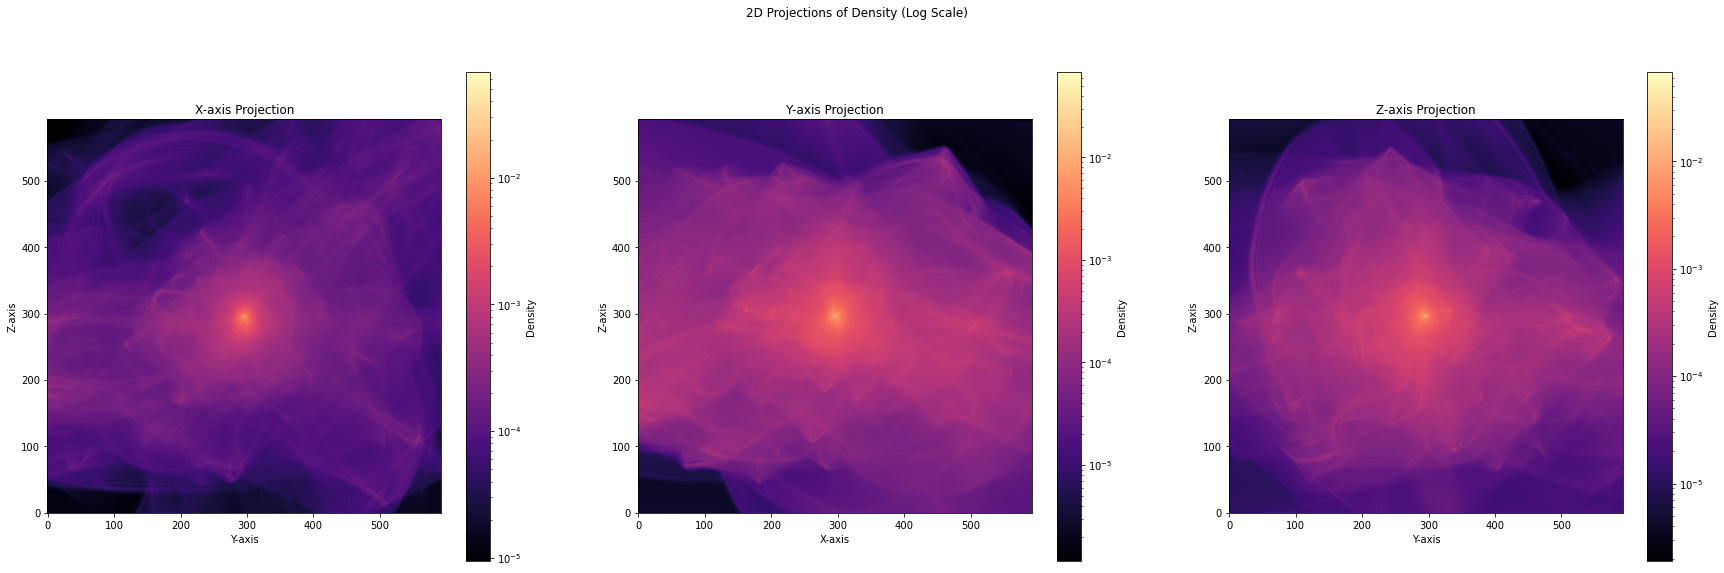

1
(535, 535, 535)


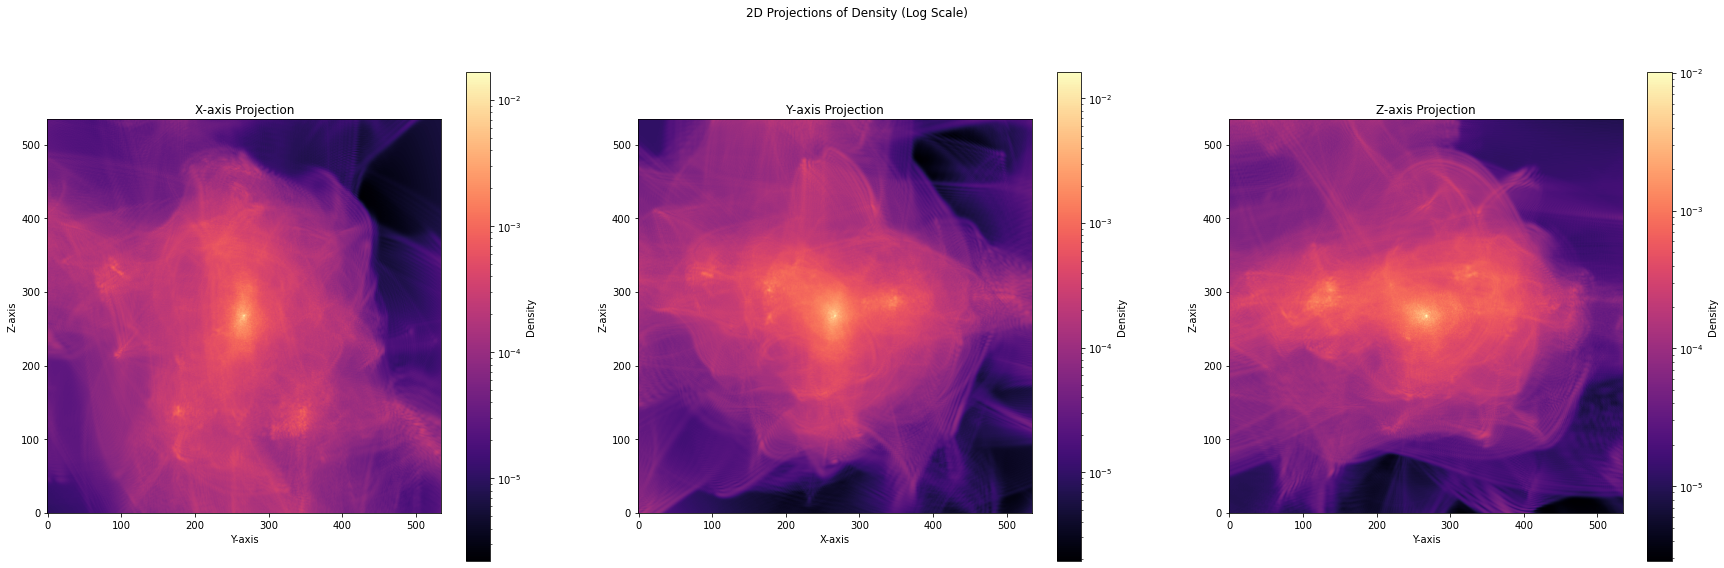

3
(513, 513, 513)


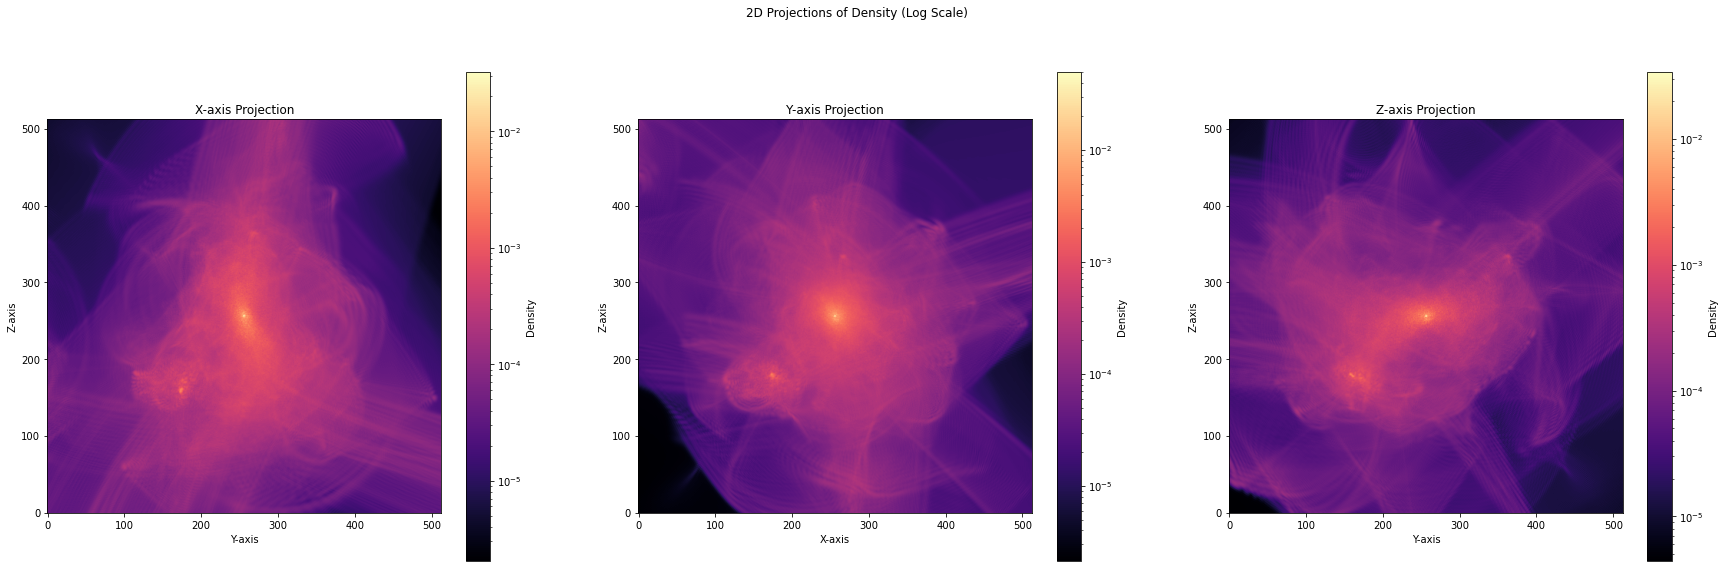

4
(495, 495, 495)


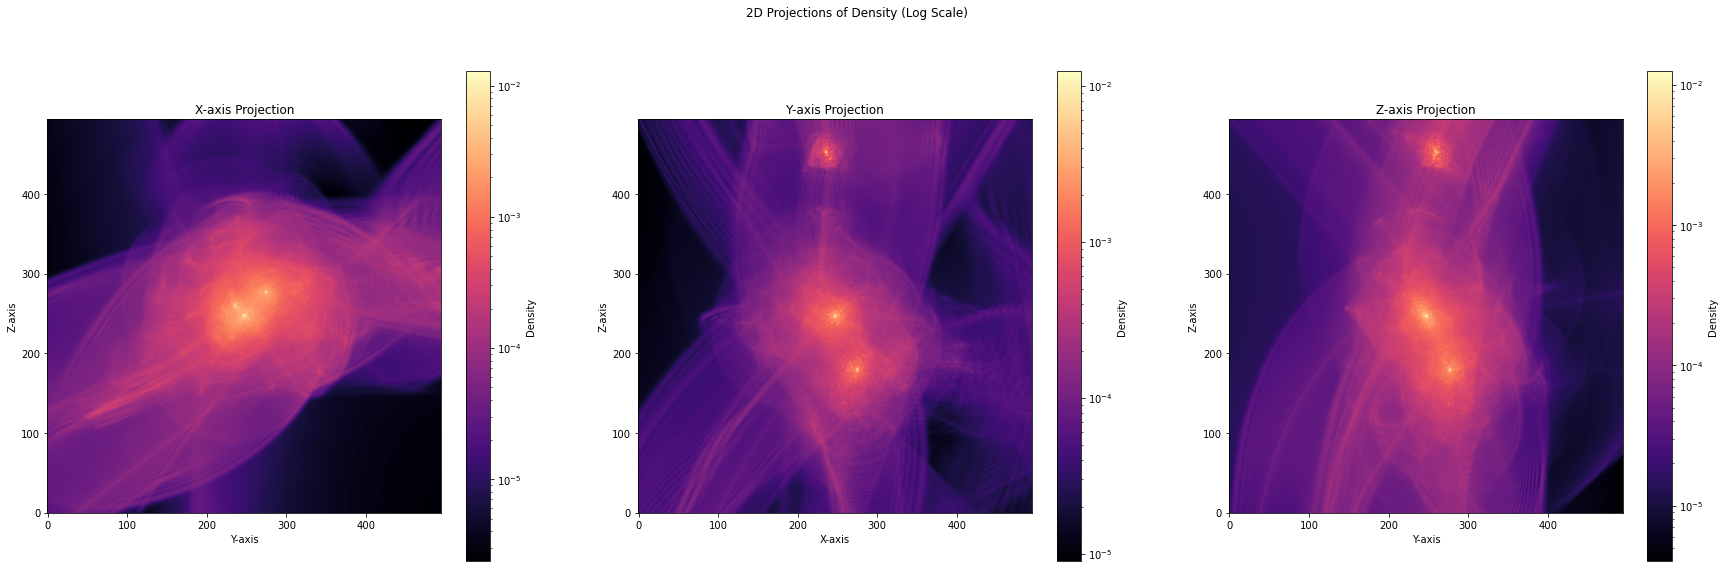

5
(489, 489, 489)


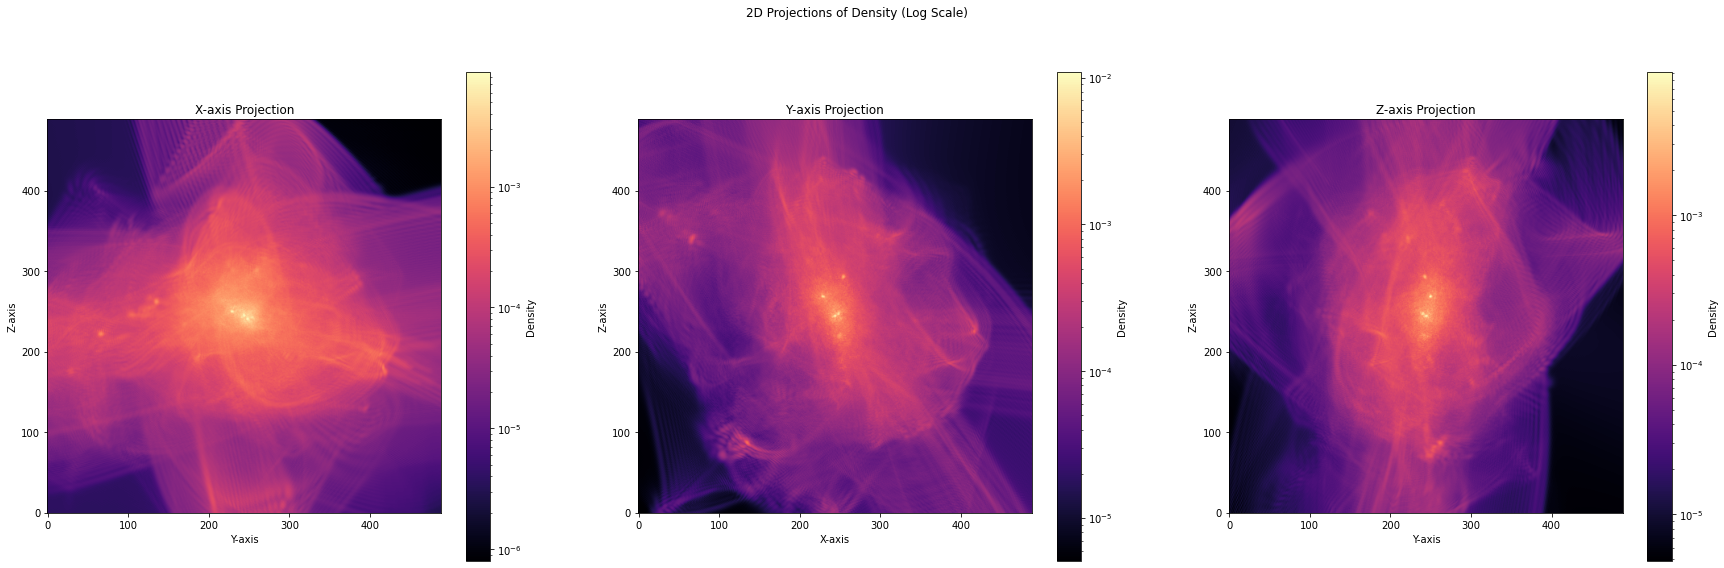

8
(479, 479, 479)


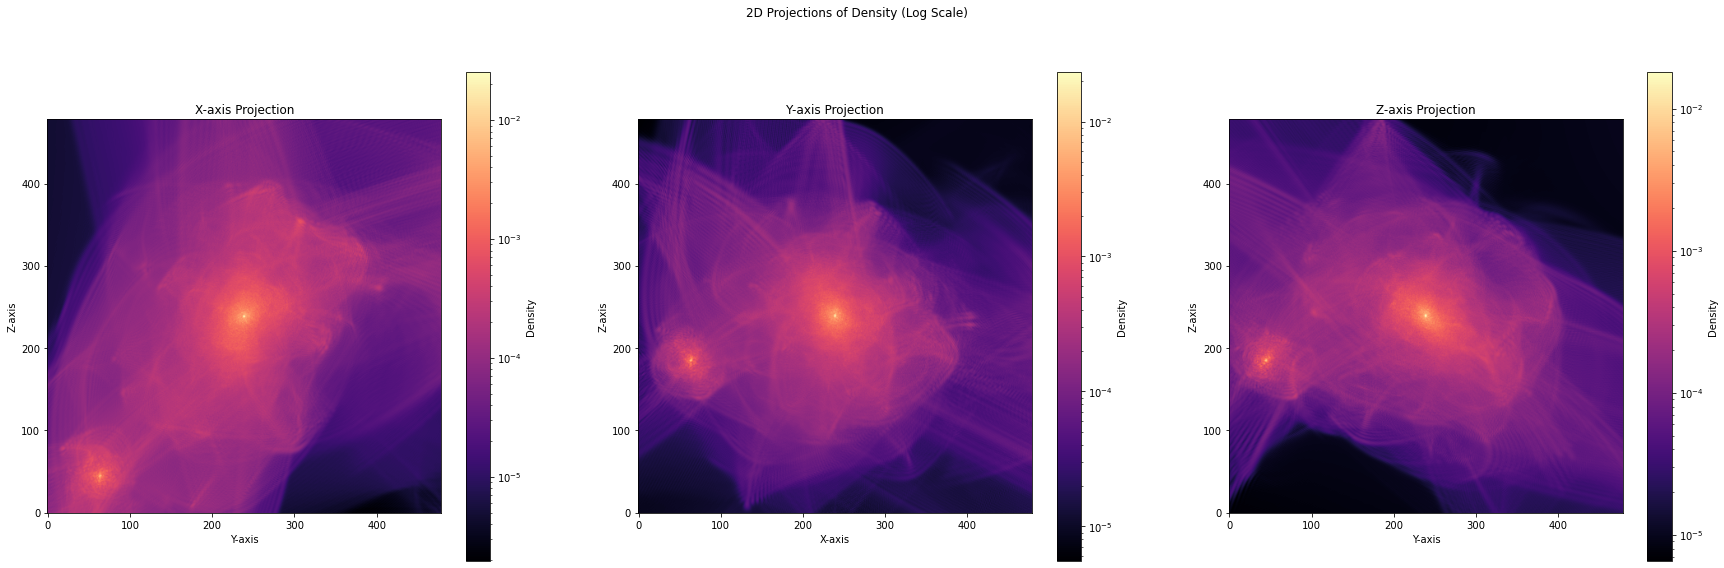

7
(477, 477, 477)


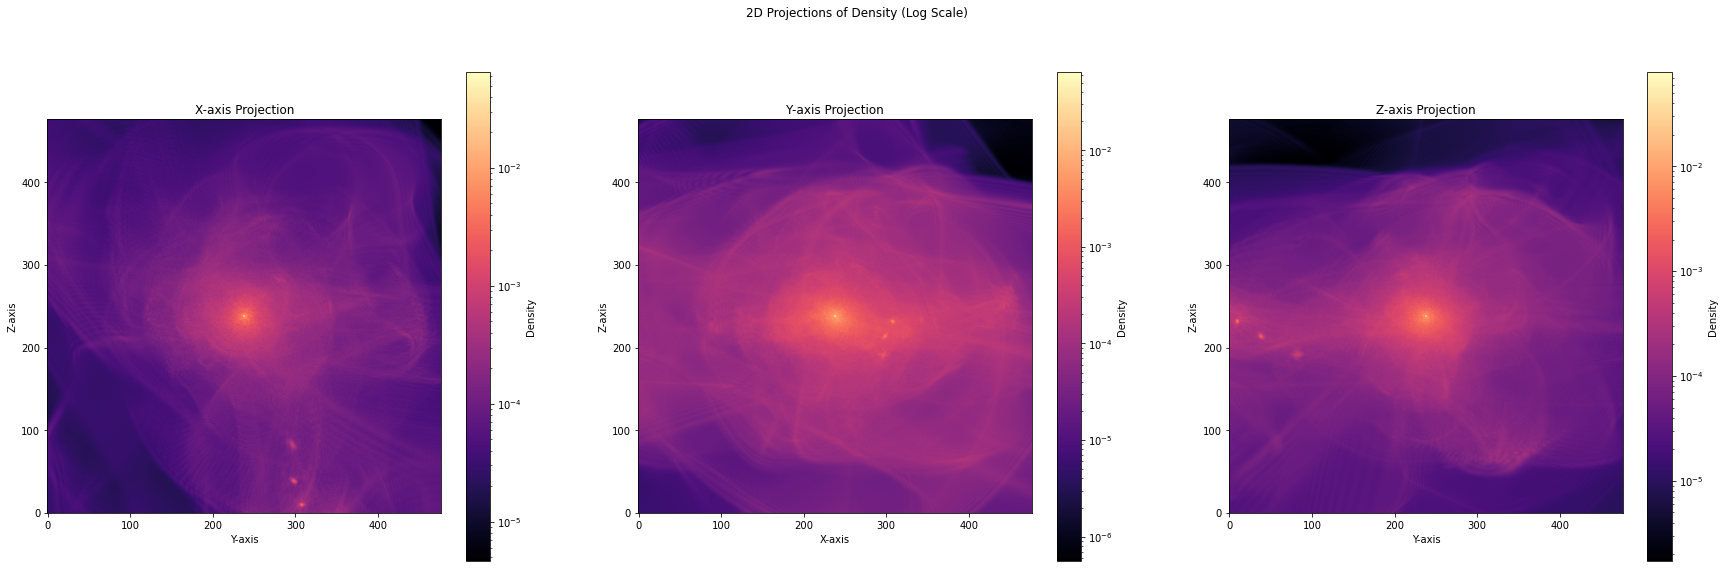

14
(471, 471, 471)


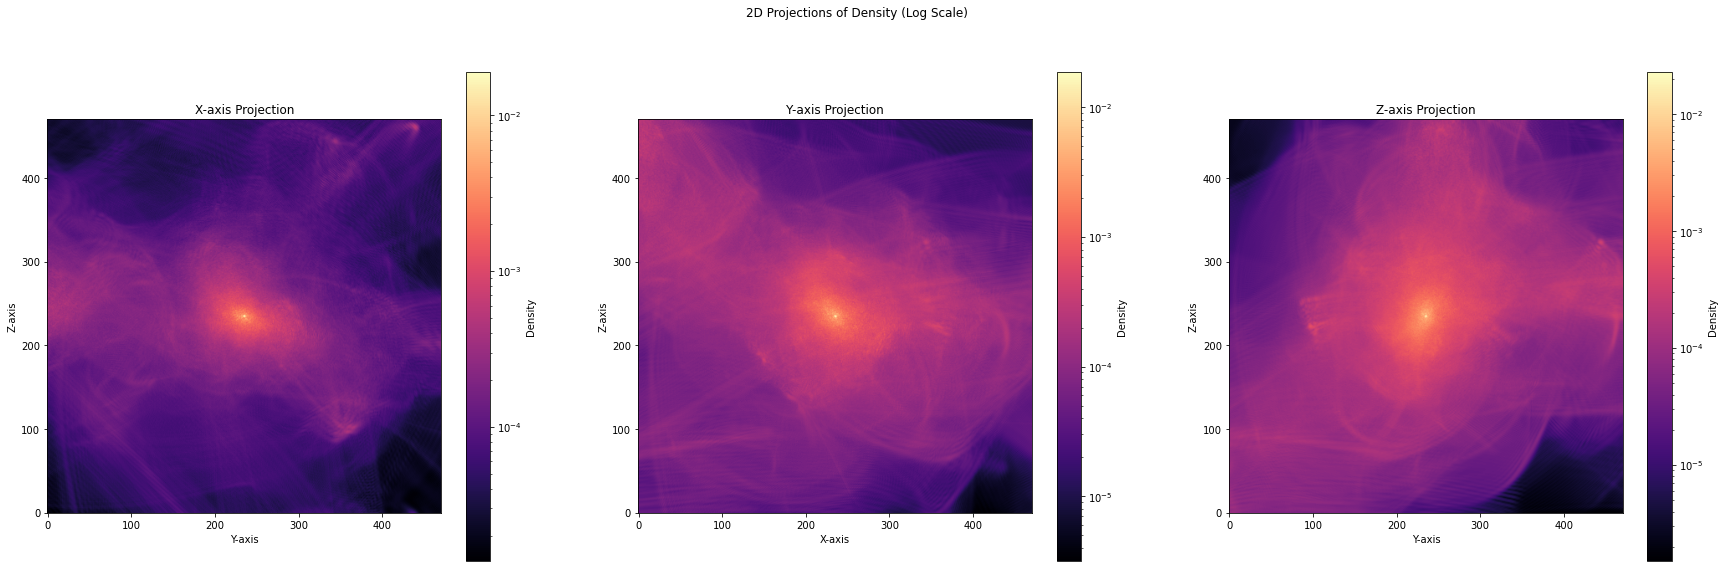

10
(465, 465, 465)


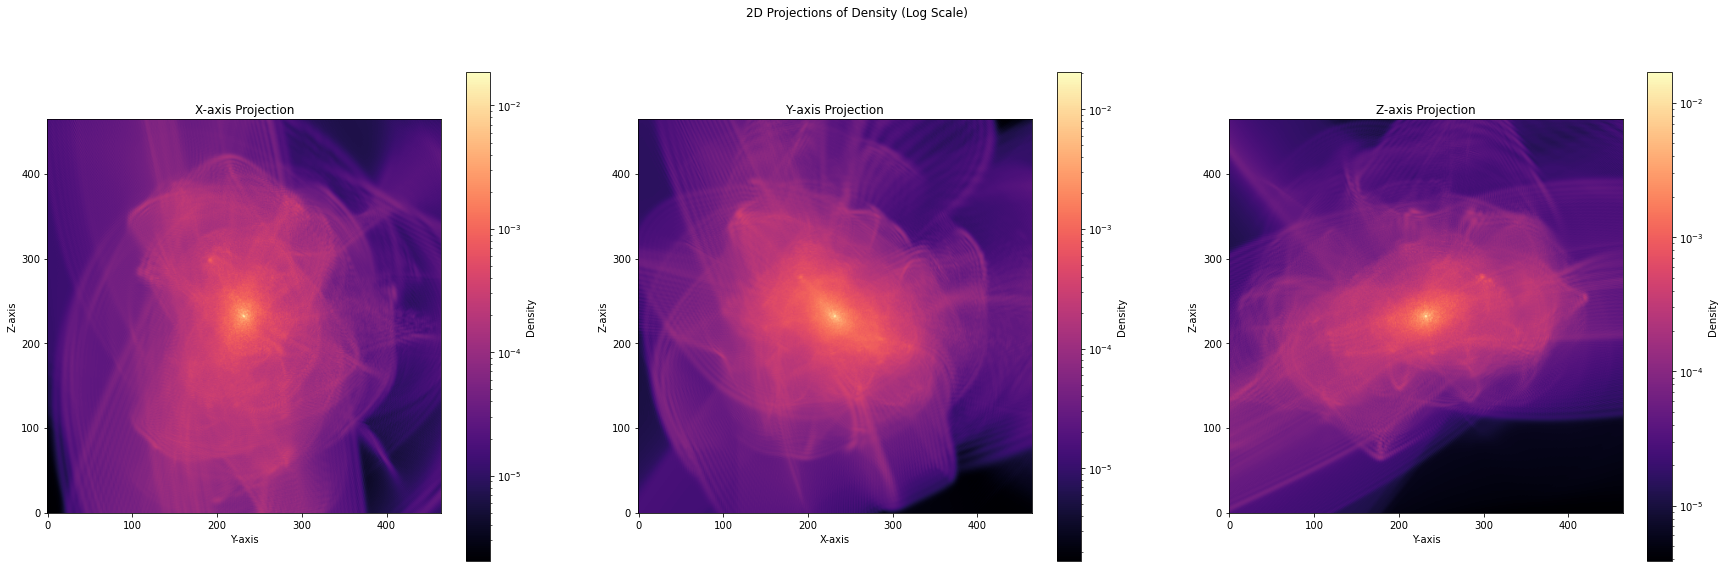

6
(461, 461, 461)


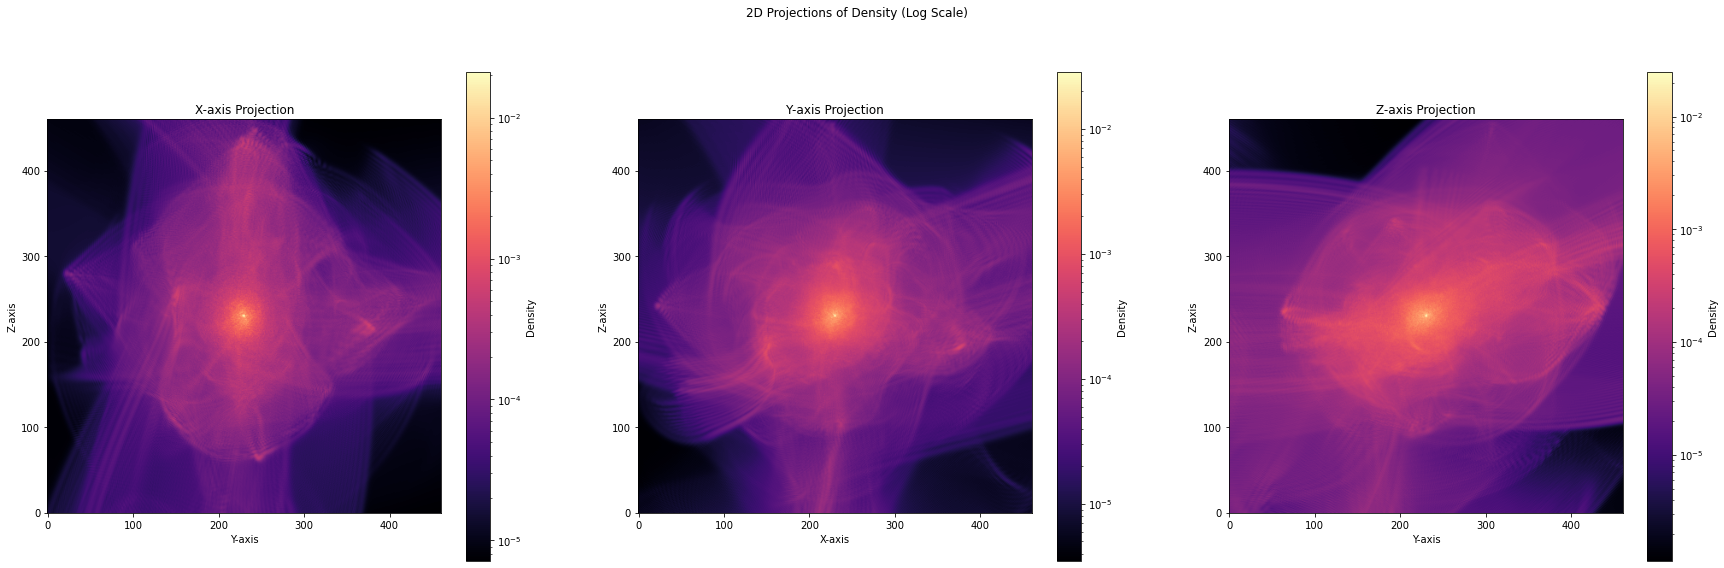

9
(447, 447, 447)


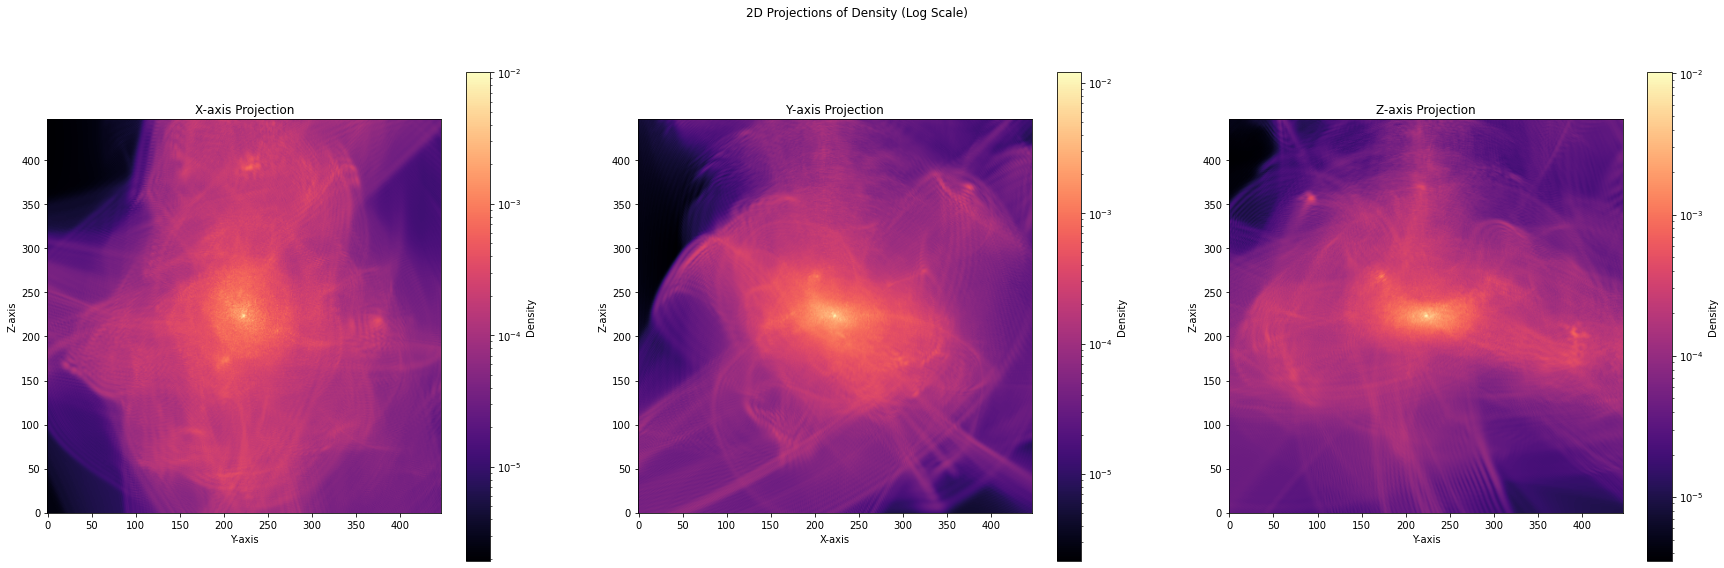

20
(429, 429, 429)


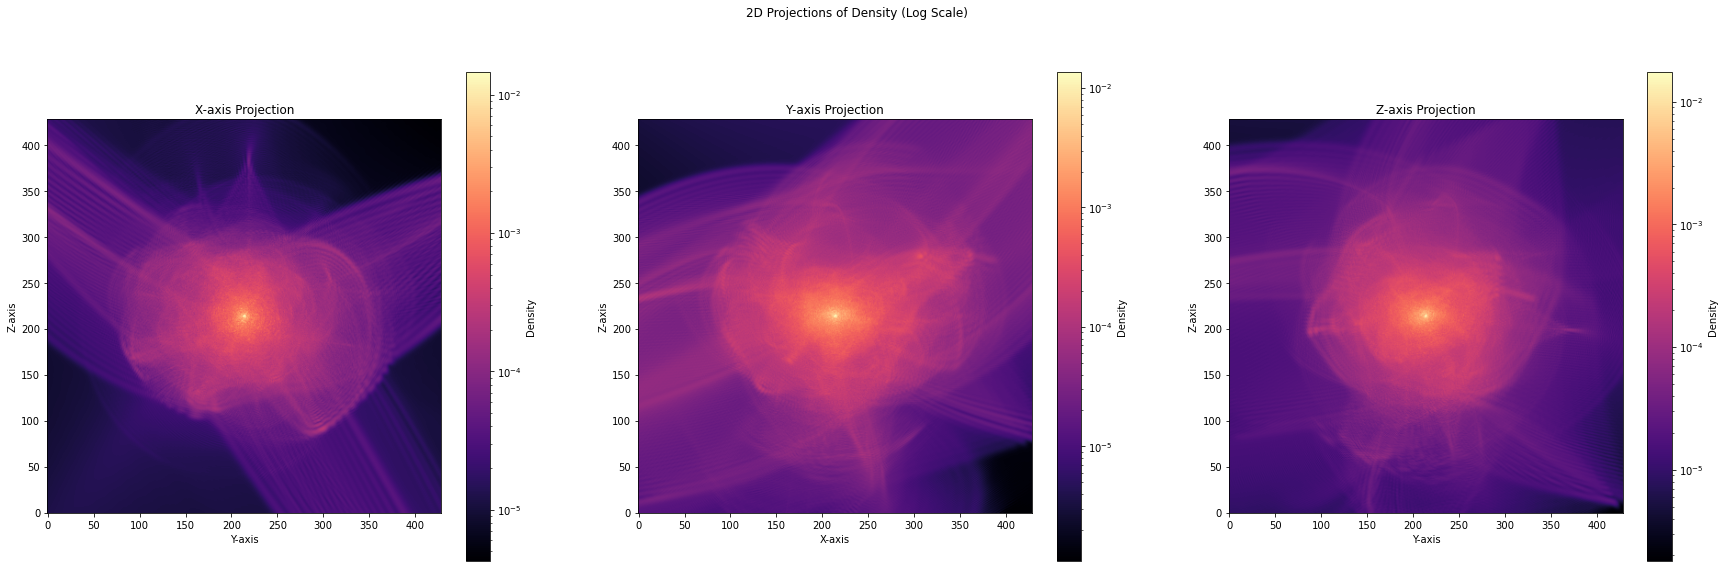

In [6]:
halo_IDs = ["0", "1", "3", "4", "5", "8", "7", "14", "10", "6", "9", "20"]

for i in halo_IDs:
    
    print(i)

    file_path = "/n/holyscratch01/dvorkin_lab/nephremidze/may-springel-fuzzy-dark-matter-simulations/fdm-ic_p8640_b10000_m7e-23/density_halo_"+str(i)+".hdf5"

    fdm_density = get_data(file_path)
    
    x_proj, y_proj, z_proj = get_projections(fdm_density)

    plot_2d_projections(x_proj, y_proj, z_proj)